# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [326]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Loading and Cleaning with Pandas

In [327]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [328]:
train_path='/content/drive/MyDrive/train-data.csv'#assigning the path
train_df=pd.read_csv(train_path)#reading the train data set
train_df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [329]:
# Removing the string from Engine, Mileage and Power columns
train_df["Engine"] = train_df["Engine"].str.replace('CC',' ')
train_df['Mileage'] = train_df['Mileage'].str.replace('km/kg', ' ')
train_df['Mileage'] = train_df['Mileage'].str.replace('kmpl', ' ')
train_df['Power'] = train_df['Power'].str.replace('bhp', ' ')
train_df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First   26.6     998     
1              41000    Diesel       Manual      First  19.67    1582     
2              46000    Petrol       Manual      First   18.2    1199     
3              87000    Diesel       Manual      First  20.77    1248     
4              40670    Diesel    Automatic     Second   15.2    1968     

     Power  Seats  New_Price  Price  
0  58.16      5.0        NaN   1.75  
1  126.2      5.0        NaN  12.50  
2   88.7      5.0  8.61 Lakh   4.50  
3  88.76      7.0        NaN   6.00  
4  140.8      5.0        NaN  17.74

In [330]:
#checking the empty value in the column
train_df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [331]:
train_df.shape#show the size of data set

(6019, 14)

In [332]:
train_df.dtypes #dispalying the datatype

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [333]:
#converting the datatype to float
train_df["Engine"] = train_df["Engine"].astype(float)
train_df["Mileage"] = train_df["Mileage"].astype(float)
train_df["Power"]=pd.to_numeric(train_df["Power"],errors="coerce")
train_df.dtypes


Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price             object
Price                float64
dtype: object

In [334]:
#finding the mode
print(train_df.Mileage.mode())
print(train_df.Engine.mode())
print(train_df.Power.mode())
print(train_df.Seats.mode())

0    17.0
dtype: float64
0    1197.0
dtype: float64
0    74.0
dtype: float64
0    5.0
dtype: float64


In [335]:
#filling the empty row using the value of mode
train_df["Mileage"].fillna(value=17.0, inplace= True)
train_df["Engine"].fillna(value=1197.0, inplace= True)
train_df["Power"].fillna(value=74.0, inplace= True)
train_df["Seats"].fillna(value=5.0, inplace= True)

In [336]:
train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]#removing the unnamed columns
train_df=train_df.drop("New_Price",axis=1)#droping the new price column because it has 5195 empty row

In [337]:
train_df.isna().sum()#checking whether there is empty row or not

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [338]:
train_df.head()#displaying the first five data from the data set

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75  
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50  
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50  
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74

In [339]:
train_df["Name"].nunique()#displaying the unique name 

1876

In [340]:
#creating the new column for the name of the car and deleting the name column
train_df["name"]=train_df["Name"].str.split(' ').str[0]
train_df.groupby("name").nunique()
train_df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74   

      name  
0   Maruti  
1  Hyundai  
2    Honda  
3   Maruti  
4     Audi

In [341]:
#droping the Name column 
train_df=train_df.drop("Name",axis=1)
train_df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  Price     name  
0    26.60   998.0   58.16    5.0   1.75   Maruti  
1    19.67  1582.0  126.20    5.0  12.50  Hyundai  
2    18.20  1199.0   88.70    5.0   4.50    Honda  
3    20.77  1248.0   88.76    7.0   6.00   Maruti  
4    15.20  1968.0  140.80    5.0  17.74     Audi

In [342]:
test_path='/content/drive/MyDrive/test-data.csv'#assigning the path
test_df=pd.read_csv(test_path)#reading the test data set
test_df.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [343]:
# Removing the string from Engine, Mileage and Power columns
test_df["Engine"] = test_df["Engine"].str.replace('CC',' ')
test_df['Mileage'] = test_df['Mileage'].str.replace('km/kg', ' ')
test_df['Mileage'] = test_df['Mileage'].str.replace('kmpl', ' ')
test_df['Power'] = test_df['Power'].str.replace('bhp', ' ')
test_df.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              40929       CNG       Manual      First  32.26     998     
1              54493    Petrol       Manual     Second   24.7     796     
2              34000    Diesel       Manual      First  13.68    2393     
3             139000    Diesel       Manual      First  23.59    1364     
4              29000    Petrol       Manual      First   18.5    1197     

     Power  Seats   New_Price  
0   58.2      4.0         NaN  
1   47.3      5.0         NaN  
2  147.8      7.0  25.27 Lakh  
3   null      5.0         NaN  
4  82.85      5.0         NaN

In [344]:
#checking the empty value in the column
test_df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [345]:
test_df.shape#show the size of data set

(1234, 13)

In [346]:
test_df.dtypes #dispalying the datatype

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object

In [347]:
#converting the datatype to float
test_df["Engine"] = test_df["Engine"].astype(float)
test_df["Power"]=pd.to_numeric(test_df["Power"],errors="coerce")
test_df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
New_Price             object
dtype: object

In [348]:
#finding the mode
print(test_df.Engine.mode())
print(test_df.Power.mode())
print(test_df.Seats.mode())

0    1197.0
dtype: float64
0    74.0
dtype: float64
0    5.0
dtype: float64


In [349]:
#filling the empty row using the value of mode
test_df["Engine"].fillna(value=1197.0, inplace= True)
test_df["Power"].fillna(value=74.0, inplace= True)
test_df["Seats"].fillna(value=5.0, inplace= True)

In [350]:
test_df = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]#removing the unnamed columns
test_df=test_df.drop("New_Price",axis=1)#droping the new price column because it has 1052 empty row

In [351]:
test_df.isna().sum()#checking whether there is empty row or not

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [352]:
test_df.head()#displaying the first five data from the data set

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              40929       CNG       Manual      First  32.26     998.0   
1              54493    Petrol       Manual     Second   24.7     796.0   
2              34000    Diesel       Manual      First  13.68    2393.0   
3             139000    Diesel       Manual      First  23.59    1364.0   
4              29000    Petrol       Manual      First   18.5    1197.0   

    Power  Seats  
0   58.20    4.0  
1   47.30    5.0  
2  147.80    7.0  
3   74.00    5.0  
4   82.85    5.0

In [353]:
test_df["Name"].nunique()#displaying the unique name 

768

In [354]:
#creating the new column for the name of the car and deleting the name column
test_df["name"]=test_df["Name"].str.split(' ').str[0]
test_df.groupby("name").nunique()
test_df.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              40929       CNG       Manual      First  32.26     998.0   
1              54493    Petrol       Manual     Second   24.7     796.0   
2              34000    Diesel       Manual      First  13.68    2393.0   
3             139000    Diesel       Manual      First  23.59    1364.0   
4              29000    Petrol       Manual      First   18.5    1197.0   

    Power  Seats     name  
0   58.20    4.0   Maruti  
1   47.30    5.0   Maruti  
2  147.80    7.0   Toyota  
3   74.00    5.0   Toyota  
4   82.85    5.0  Hyundai

In [355]:
#droping the Name column 
test_df=test_df.drop("Name",axis=1)
test_df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0       Delhi  2014              40929       CNG       Manual      First   
1  Coimbatore  2013              54493    Petrol       Manual     Second   
2      Mumbai  2017              34000    Diesel       Manual      First   
3   Hyderabad  2012             139000    Diesel       Manual      First   
4      Mumbai  2014              29000    Petrol       Manual      First   

   Mileage  Engine   Power  Seats     name  
0  32.26     998.0   58.20    4.0   Maruti  
1   24.7     796.0   47.30    5.0   Maruti  
2  13.68    2393.0  147.80    7.0   Toyota  
3  23.59    1364.0   74.00    5.0   Toyota  
4   18.5    1197.0   82.85    5.0  Hyundai

# 3.  EDA and Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


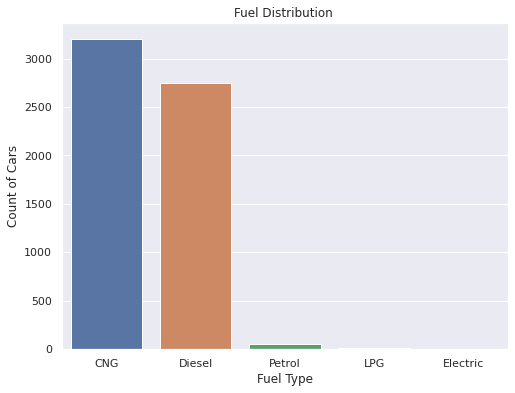

In [356]:
#fuel type vs count of car
x = train_df.Fuel_Type.unique()
y = train_df.Fuel_Type.value_counts()
sns.barplot(x,y,data=train_df)
plt.title('Fuel Distribution ')
plt.xlabel('Fuel Type')
plt.ylabel('Count of Cars')
plt.show()

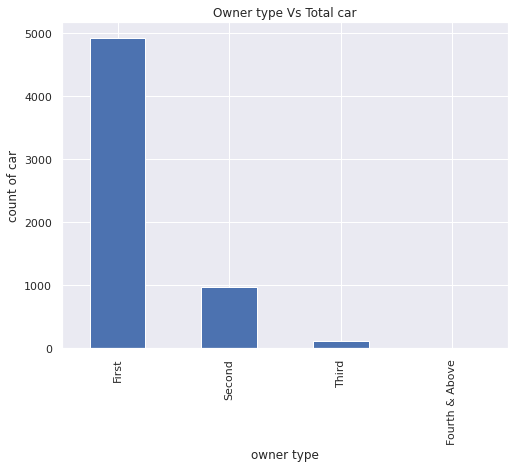

In [357]:
#type of owner vs count of car
plt.xlabel("owner type")
plt.ylabel("count of car")
plt.title("Owner type Vs Total car")
train_df["Owner_Type"].value_counts().plot(kind='bar')
plt.show()

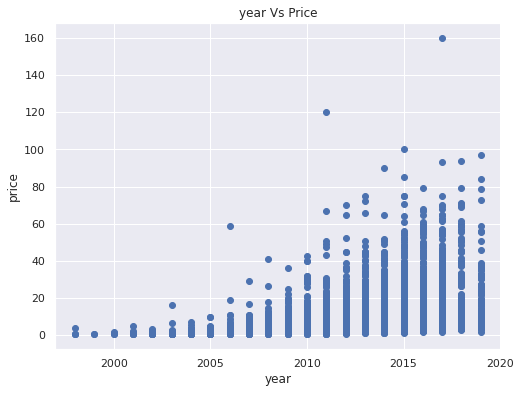

In [358]:
#price vs year
plt.xlabel("year")
plt.ylabel("price")
plt.title("year Vs Price")
plt.scatter(train_df.Year, train_df.Price)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


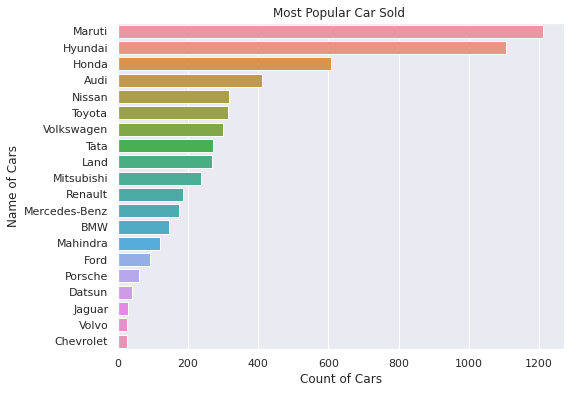

In [359]:
#name of car vs count of car
x = train_df.name.unique()[:20]
y = train_df.name.value_counts()[:20]
sns.barplot(y,x,data=train_df,orient='h')
plt.title('Most Popular Car Sold ')
plt.xlabel('Count of Cars')
plt.ylabel('Name of Cars')
plt.show()

# 4. Feature Engineering 

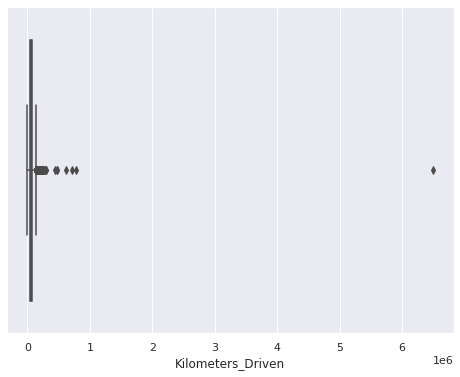

In [360]:
# ploting boxplot to check outliers
#Kilometers_Driven
sns.boxplot(x=train_df['Kilometers_Driven'])
plt.show()

In [390]:
#Outlier Detection and removing using IQR Method for train data
Q1 = train_df.Kilometers_Driven.quantile(0.25)
Q3 = train_df.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [362]:
traindf = train_df[(train_df.Kilometers_Driven > lowerlimit) & (train_df.Kilometers_Driven < upperlimit)]


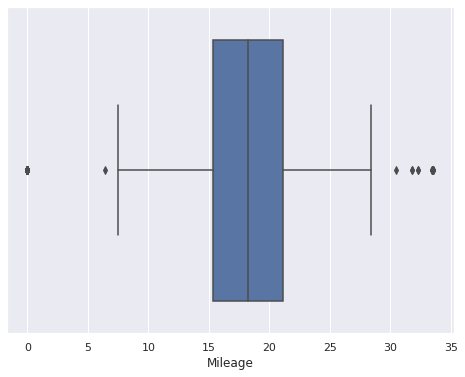

In [363]:
# For Mileage
sns.boxplot(x=traindf['Mileage'])
plt.show()

In [364]:
#Outlier Detection and removing using IQR Method for train data
PQ1 = traindf.Power.quantile(0.25)
PQ3 = traindf.Power.quantile(0.75)
PIQR = PQ3 - PQ1
Pupperlimit = PQ3 + (PIQR * 1.5)
Plowerlimit = PQ1 - (PIQR * 1.5)

In [365]:
traindf1 = traindf[(traindf.Mileage > lowerlimit) & (traindf.Mileage < upperlimit)]
traindf1.shape

(5817, 12)

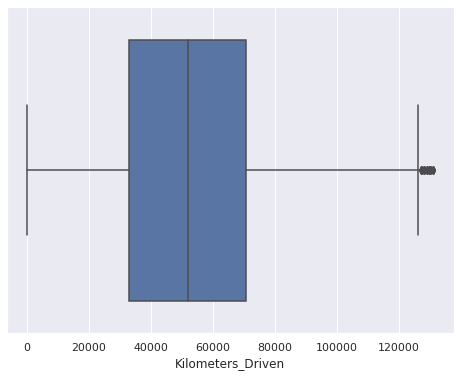

In [366]:
# ploting boxplot to check outliers are removed or not
sns.boxplot(x=traindf1['Kilometers_Driven'])
plt.show()

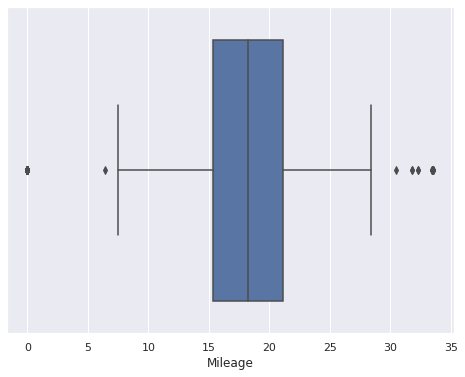

In [367]:
#ploting boxplot to check outliers are removed or not
sns.boxplot(x=traindf1['Mileage'])
plt.show()

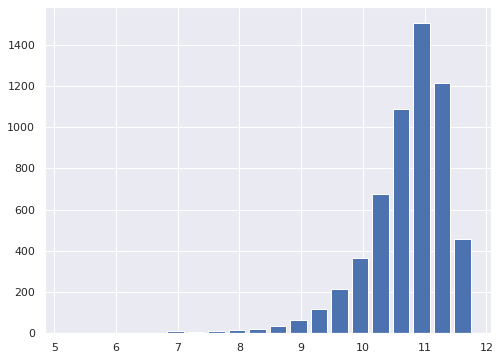

In [368]:
# Applying log transformation
x = np.log(traindf1['Kilometers_Driven'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

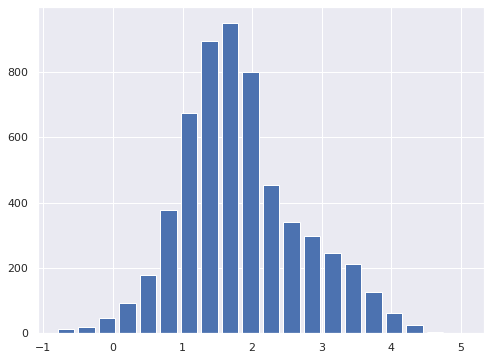

In [369]:
# Applying log transformation
x = np.log(traindf1['Price'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

In [370]:
traindf1.dtypes#datatypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
name                  object
dtype: object

In [371]:
#Feature Scaling using MinMax Scaler for training data
numeric_columns = ['Year','Kilometers_Driven','Mileage','Engine', 'Power', 'Seats', 'Price']
numericdf = traindf1[numeric_columns]

In [372]:
# Dataframe before scaling
numericdf.head()

Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price
0  2010              72000    26.60   998.0   58.16    5.0   1.75
1  2015              41000    19.67  1582.0  126.20    5.0  12.50
2  2011              46000    18.20  1199.0   88.70    5.0   4.50
3  2012              87000    20.77  1248.0   88.76    7.0   6.00
4  2013              40670    15.20  1968.0  140.80    5.0  17.74

In [373]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdf)

In [374]:
 #dataframe after scaling
transformdf = pd.DataFrame(data=numeric,columns=numeric_columns)
transformdf.head()

Year  Kilometers_Driven   Mileage    Engine     Power  Seats     Price
0  0.571429           0.549030  0.793083  0.156261  0.045569    0.5  0.008210
1  0.809524           0.312079  0.586464  0.254809  0.174971    0.5  0.075583
2  0.619048           0.350297  0.542636  0.190179  0.103652    0.5  0.025445
3  0.666667           0.663683  0.619261  0.198448  0.103766    0.7  0.034846
4  0.714286           0.309557  0.453190  0.319946  0.202739    0.5  0.108423

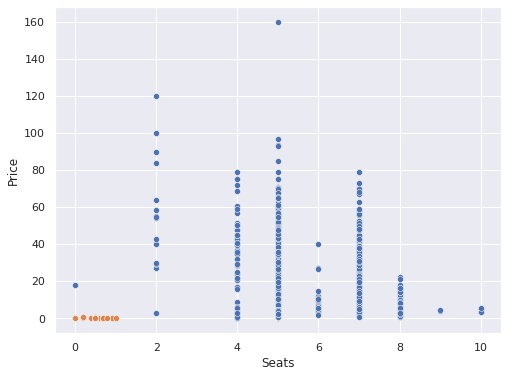

In [375]:
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(data=traindf1,x='Seats',y='Price')
sns.scatterplot(data = transformdf,x='Seats',y='Price')
plt.show()

In [376]:
# Performing label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [377]:
traindf1['name'] = label_encoder.fit_transform(traindf1['name'])
traindf1['Location'] = label_encoder.fit_transform(traindf1['Location'])
traindf1['Fuel_Type'] = label_encoder.fit_transform(traindf1['Fuel_Type'])
traindf1['Transmission'] = label_encoder.fit_transform(traindf1['Transmission'])
traindf1['Owner_Type'] = label_encoder.fit_transform(traindf1['Owner_Type'])

test_df['name'] = label_encoder.fit_transform(test_df['name'])
test_df['Location'] = label_encoder.fit_transform(test_df['Location'])
test_df['Fuel_Type'] = label_encoder.fit_transform(test_df['Fuel_Type'])
test_df['Transmission'] = label_encoder.fit_transform(test_df['Transmission'])
test_df['Owner_Type'] = label_encoder.fit_transform(test_df['Owner_Type'])

traindf1.head()

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0         9  2010              72000          0             1           0   
1        10  2015              41000          1             1           0   
2         2  2011              46000          4             1           0   
3         2  2012              87000          1             1           0   
4         3  2013              40670          1             0           2   

   Mileage  Engine   Power  Seats  Price  name  
0    26.60   998.0   58.16    5.0   1.75    18  
1    19.67  1582.0  126.20    5.0  12.50    10  
2    18.20  1199.0   88.70    5.0   4.50     9  
3    20.77  1248.0   88.76    7.0   6.00    18  
4    15.20  1968.0  140.80    5.0  17.74     1

# 5. Training Model

In [378]:
y = traindf1.Price
X = traindf1.drop(['Price'],axis=1)

In [379]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

In [380]:
 # Creating the model using scikit learn 
 #linerRregression
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [381]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=200)
model1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

### 6. Prediction

In [382]:
#Prediction using Linear Regresion Model
y_pred1 = model1.predict(X_valid)
y_pred1

array([ 6.6378 , 21.7212 ,  5.3148 , ...,  6.10425,  7.60285,  4.02935])

In [383]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))


Mean Absolute Error: 1.4622455724308623
Mean Squared Error: 17.63346692453491
Root Mean Squared Error: 4.199222180896709
R2 score : 0.860300


In [384]:
#Prediction using  Random Forest Model
y_pred2 = model1.predict(X_valid)
y_pred2

array([ 6.6378 , 21.7212 ,  5.3148 , ...,  6.10425,  7.60285,  4.02935])

In [385]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred2)))
print("R2 score : %f" % r2_score(y_valid,y_pred2))

Mean Absolute Error: 1.4622455724308623
Mean Squared Error: 17.63346692453491
Root Mean Squared Error: 4.199222180896709
R2 score : 0.860300


# 7. Evaluating your Model

In [386]:
#Based on Linear regresion model
Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted))

Train set accuracy:  0.7152828061696388
Test set accuracy :  0.662512226693712


In [387]:
Result = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted})
Result.head(10)

Actual Price  Predicted Price
4132          6.25         7.632295
437          22.00        21.373607
517           4.95         5.807263
2001          2.20        -2.004844
3504          2.01        -2.377095
1577         23.25        25.745352
2005         17.50        17.827633
9             1.95         3.585412
1430         32.44        29.094218
905           2.85        -1.509342

In [388]:
#based on Random forest model
Y_train_predicted1 = model1.predict(X_train)
Y_test_predicted1 = model1.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted1))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted1))

Train set accuracy:  0.9852027380549151
Test set accuracy :  0.8602997570028756


In [389]:
Result = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted})
Result.head(10)

Actual Price  Predicted Price
4132          6.25         7.632295
437          22.00        21.373607
517           4.95         5.807263
2001          2.20        -2.004844
3504          2.01        -2.377095
1577         23.25        25.745352
2005         17.50        17.827633
9             1.95         3.585412
1430         32.44        29.094218
905           2.85        -1.509342

# SUBMISSION DATE: 2nd April 2022